# Lab5 - Training Deep Convolutional Neural Network
- Pasit Hankijpongpan, 60070501036
- Pisut Suntronkiti, 60070501037

Name your file to (first 2 student ID digit)_(last 4 student ID digit)*4.ipynb

## Lab Instruction 

In this lab, you will learn to train a deep convolutional neural network using Keras library with Tensorflow backend. We will use  Cat vs Dog dataset.

See https://www.kaggle.com/c/dogs-vs-cats/data


### Your Turn! Dog or Cat Application 

Now, it time to put everything together and develop and Cat vs Dog classifier model. Assume that you and your company want to get more attraction on your product by launching a new product that can classify whether it is a dog or a cat. You have decide that you want a precision more than 90 - 95% in order to launch to product.

You have a cat and dog dataset contain total of 25000 images, 12500 for cat and other half for a dog.

After successfully develop this model, you can try to play with it to see how it perform. (You can upload your selfies image to see you are a dog or a cat)

Some note before start a project:
1. You have to load a data into a project using any method 
**suggest**
   

```
 !wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
 !unzip -qq Cat_Dog_data.zip
```


2. You have to plan on how you will split a data. (or no need for suggest method)
3. You have to preprocess your data before feed into a network. For example, cropping, padding, etc.
4. You can come up with any model or use pre-train model. It depend on you!

You have two weeks for this project so that you can complete with your competitor app! Now, create a new Jupyter notebook and start building a model!

In [ ]:
# load data
!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

--2020-09-28 22:57:05--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.28.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.28.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  77.4MB/s    in 8.0s    

2020-09-28 22:57:14 (69.4 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [ ]:
# install library
!pip uninstall keras-preprocessing
!pip install git+https://github.com/keras-team/keras-preprocessing.git

Uninstalling Keras-Preprocessing-1.1.2:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras_Preprocessing-1.1.2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/keras_preprocessing/*
Proceed (y/n)? y
  Successfully uninstalled Keras-Preprocessing-1.1.2
  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-s89jc4yp
  Running command git clone -q https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-s89jc4yp
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-cp36-none-any.whl size=42982 sha256=dd1f904510e0e0407ad8f232bf7eee51442924273c18c4bf6d18f0730762ef75
  Stored in directory: /tmp/pip-ephem-wheel-cache-d3rw16i3/wheels/03/a0/39/171f6040d36f36c71168dc69afa81334351b20955dc36ce932
Successfully built Keras-Preprocessing


In [ ]:
# import libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import callbacks
from keras import backend as K
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import np_utils
from keras.layers.convolutional import  MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# %load _utils
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras import backend as K

# Test
def print_hello():
    print('Hello')

# define a function to plot the result from training step
def show_result(history): 
    
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['acc'][-1])
    print('Last validation accuracy: %s'%history.history['val_acc'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(loss) + 1)   
    
    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))
    
    # Plot loss
    loss_plot = axs[0]
    
    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    
    # Plot accuracy
    acc_plot = axs[1]
    
    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

# Define an evaluation function to print the evaluation result
def evaluation_report(model,features,labels):

    # Calculate result
    result = model.evaluate(features, verbose=False)
    
    # Predict and convert into a class
    pred_class = model.predict(features).argmax(axis=1)
    labels = labels.argmax(axis=1)
    # Show report
    print(confusion_matrix(labels,pred_class))
    print(classification_report(labels,pred_class))
    print("Loss: %s Accuracy: %s" %(result[0],result[1]))
    
    return pred_class


# Show a subplot of the incorrect predict data
def show_false_prediction(predict, feature, label, img_size=28, channel=1):

    false_pred = feature[(predict != label).tolist()]
    actual_label = label[(predict != label).tolist()]
    false_label = predict[(predict != label).tolist()]
    if channel == 3:
        false_pred = false_pred.reshape(false_pred.shape[0],img_size,img_size,channel)
    elif channel == 1:
        false_pred = false_pred.reshape(false_pred.shape[0],img_size,img_size)
    else:
        raise ValueError('Must be RGB or gray scale image')
    
    print(false_pred.shape)

    fig, ax = plt.subplots(3,10,figsize=(15,6))
    fig.suptitle('The incorrect prediction')

    for i in range(3):
        for j in range(10):
            ax[i,j].imshow(false_pred[j + i*10],cmap='gray')
            ax[i,j].set_title('Pred %s Act %s'%(false_label[j + i*10],actual_label[j + i*10]))
            
# Show activation value of each layer
def show_layer_activation(activation, model,num_layer,num_row=16):
    layer_names = []
    for layer in model.layers[:num_layer]:
        layer_names.append(layer.name)

    images_per_row = num_row
    for layer_name, layer_activation in zip(layer_names,activation):
        n_features = layer_activation.shape[-1]

        size = layer_activation.shape[1]

        n_cols = n_features//images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:,:,col*images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0,255).astype('uint8')
                display_grid[col*size:(col +1)*size,
                             row*size:(row+1)*size] = channel_image
        scale = 1./size
        plt.figure(figsize=(scale*display_grid.shape[1],
                           scale*display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        
        
def deprocess_image(img):
    
    # Zero-centering and make sure that std is 0.1
    img -= img.mean()
    img /= (img.std() + 1e-5)
    img *= 0.1
    
    # Clips to [0,1]
    img += 0.5
    img = np.clip(img,0,1)
    
    # Convert to RGB array
    img *= 255
    img = np.clip(img,0,255).astype('uint8')
    
    return img

def generate_pattern(model, layer_name , filter_index, size=150):
    # Build the loss function that maximize the activation of the nth filter of the layer under consideration
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    
    # Compute the gradient of the input picture with regard to this loss
    grads = K.gradients(loss, model.input)[0]
    
    # Normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) +1e-5)
    
    # Return the loss and gradient given the input picture
    iterate = K.function([model.input],[loss, grads])
    
    # Stars from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    # Run gradient ascent for 40 step
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

### feed layer name. ie, 'conv_1'
def visualize_filter(model,layer_name, size= 64, margin = 5):

    # Empty black image to store results
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    # iterate over the row of result grid
    for i in range(8):
        # Iterate over the column of the result grid
        for j in range(8):
            # Generates the pattern for filter i + (j*8) in layer_name
            filter_img = generate_pattern(model, layer_name, i + (j*8), size=size)
            
            # Puts the result in the square (i,j) of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start:horizontal_end,
                    vertical_start:vertical_end, :] = filter_img

    plt.figure(figsize=(20,20))
    plt.imshow(results)  

In [ ]:
from keras_preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
import os

## **1. Load Cat_Dog_data & Preprocessing**

In [ ]:
# train data
train_cat_dir = 'Cat_Dog_data/train/cat'
train_dog_dir = 'Cat_Dog_data/train/dog'
train_cat_filenames = os.listdir(train_cat_dir)
train_dog_filenames = os.listdir(train_dog_dir)
train_labels = ['0']*len(train_cat_filenames) + ['1']*len(train_dog_filenames)

# test data
test_cat_dir = 'Cat_Dog_data/test/cat'
test_dog_dir = 'Cat_Dog_data/test/dog'
test_cat_filenames = os.listdir(test_cat_dir)
test_dog_filenames = os.listdir(test_dog_dir)
test_labels = ['0']*len(test_cat_filenames) + ['1']*len(test_dog_filenames)

In [ ]:
# create 'total' folder for train dataset and copy all images to this
!mkdir -p Cat_Dog_data/train/total
!cp Cat_Dog_data/train/cat/* Cat_Dog_data/train/dog/* Cat_Dog_data/train/total/

# create 'total' folder for test dataset and copy all images to this
!mkdir -p Cat_Dog_data/test/total
!cp Cat_Dog_data/test/cat/* Cat_Dog_data/test/dog/* Cat_Dog_data/test/total/

In [ ]:
# create train dataframe and validation dataframe
train_dir = 'Cat_Dog_data/train/total'
train_df = pd.DataFrame(data={'filename': train_cat_filenames + train_dog_filenames,
                              'class': train_labels},
                        columns=['filename', 'class'])
val_df = train_df.sample(frac=.1)
train_df = train_df.drop(val_df.index)

# create test dataframe
test_dir = 'Cat_Dog_data/test/total'
test_df = pd.DataFrame(data={'filename': test_cat_filenames + test_dog_filenames,
                              'class': test_labels},
                        columns=['filename', 'class'])

In [ ]:
# load images as generator object
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)


BATCH_SIZE = 15

train_gen = train_gen.flow_from_dataframe(dataframe=train_df,
                                         directory=train_dir,
                                         x_col="filename",
                                         y_col="class",
                                         target_size=(224,224),
                                         batch_size=BATCH_SIZE)

val_gen = val_gen.flow_from_dataframe(dataframe=val_df,
                                       directory=train_dir,
                                       x_col="filename",
                                       y_col="class",
                                       target_size=(224,224),
                                       batch_size=BATCH_SIZE)

test_gen = test_gen.flow_from_dataframe(dataframe=test_df,
                                       directory=test_dir,
                                       x_col="filename",
                                       y_col="class",
                                       target_size=(224,224),
                                       batch_size=BATCH_SIZE)

Found 20250 validated image filenames belonging to 2 classes.
Found 2250 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


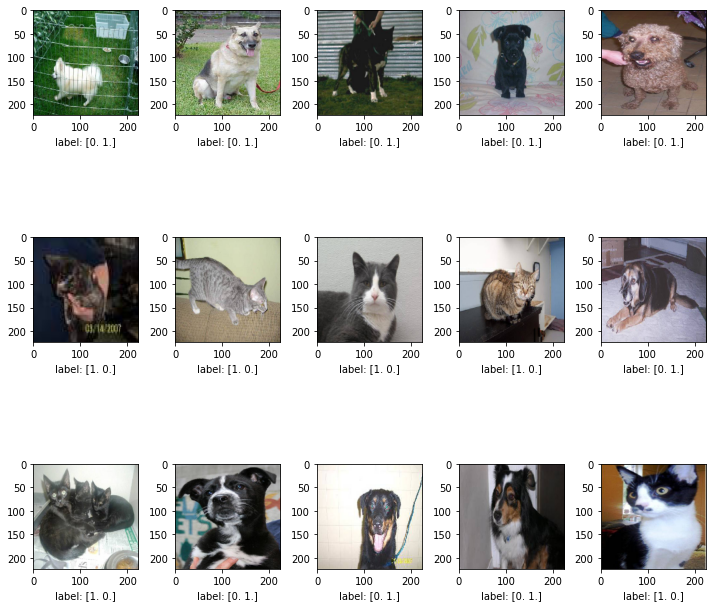

In [ ]:
# show img labels
plt.figure(figsize=(10, 10))
for index, img in enumerate(test_gen[165][0]):
    plt.subplot(3, 5, index+1)
    plt.imshow(img)
    plt.xlabel('label: ' + str(test_gen[165][1][index]))
plt.tight_layout()
plt.show()

## **2. Build a Convolutional Neural Network**

### 2.1 Keras Tuner

In [ ]:
# def build_model(hp):
#   cnn = models.Sequential()
#   cnn.add(layers.Conv2D(filters= hp.Int( 'filters1',
#                                           min_value = 32,
#                                           max_value = 256,
#                                           step = 32),
#                         kernel_size=3,
#                         padding='same',
#                         activation = 'elu',
#                         kernel_initializer='he_normal',
#                         input_shape=(IMG_WIDTH,IMG_HEIGHT,CHANNEL,),
#                         name = 'conv_1',
#                       ))
#   cnn.add(layers.Conv2D(filters= hp.Int( 'filters2',
#                                           min_value = 32,
#                                           max_value = 256,
#                                           step = 32),
#                         kernel_size=3,
#                         padding='same',
#                         activation = 'elu',
#                         kernel_initializer='he_normal',
#                         input_shape=(IMG_WIDTH,IMG_HEIGHT,CHANNEL,),
#                         name = 'conv_2',
#                       ))
#   # cnn.add(layers.Dropout(0.5,name='dropout_1'))
#   cnn.add(layers.MaxPooling2D(3,1,name='max_pool_1'))
#   cnn.add(layers.Conv2D(filters= hp.Int( 'filters3',
#                                           min_value = 32,
#                                           max_value = 256,
#                                           step = 32),
#                         kernel_size=3,
#                         padding='same',
#                         kernel_initializer='he_normal',
#                         activation = 'elu',
#                         name = 'conv_3',
#                       ))
#   cnn.add(layers.MaxPooling2D(3,1,name='max_pool_3'))
#   cnn.add(layers.Flatten())
#   cnn.add(layers.Dense(units= hp.Int('units1',
#                                       min_value = 32,
#                                       max_value = 512,
#                                       step = 32),
#                       activation='elu',
#                       kernel_initializer='he_normal',
#                       name='fully_connect_1'
#                       ))
#   cnn.add(layers.Dropout(0.5,name='dropout_4'))
#   cnn.add(layers.Dense(units= hp.Int('units2',
#                                       min_value = 32,
#                                       max_value = 512,
#                                       step = 32),
#                       activation='elu',
#                       kernel_initializer='he_normal',
#                       name='fully_connect_2'
#                       ))
#   cnn.add(layers.Dropout(0.5,name='dropout_5'))
#   cnn.add(layers.Dense(2,activation='softmax',
#                       kernel_initializer='he_normal',
#                       name='output'
#                       ))
#   cnn.compile(optimizer= 'adam',
#             loss = 'binary_crossentropy',
#             metrics=['acc'])
#   return cnn

In [ ]:
# from kerastuner.tuners import RandomSearch

# tuner = RandomSearch(
#     build_model,
#     objective='val_acc',
#     max_trials=5,
#     executions_per_trial=1,
#     directory='tuning_log'
#     )

In [ ]:
# tuner.search_space_summary()

In [ ]:
# tuner.search(X_train, y_train,
#              epochs=3,
#              batch_size=128,
#              validation_data=(X_val, y_val)
#              )

In [ ]:
# tuner.get_best_hyperparameters()[0].values

In [ ]:
# tuner.results_summary()

### 2.2 Build Model

In [ ]:
# create a cnn model
from keras import models, layers
cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=32,
                      kernel_size=3,
                      padding='same',
                      activation = 'elu',
                      kernel_initializer='he_normal',
                      input_shape=(224,224,3,),
                      name = 'conv_1',
                     ))
cnn.add(layers.Dropout(0.5,name='dropout_1'))
cnn.add(layers.MaxPooling2D(2,2,name='max_pool_1'))
cnn.add(layers.Conv2D(filters=32,
                      kernel_size=3,
                      padding='same',
                      activation = 'elu',
                      kernel_initializer='he_normal',
                      input_shape=(224,224,3,),
                      name = 'conv_2',
                     ))
cnn.add(layers.Dropout(0.5,name='dropout_2'))
cnn.add(layers.MaxPooling2D(2,2,name='max_pool_2'))
cnn.add(layers.Conv2D(filters=32,
                      kernel_size=3,
                      padding='same',
                      kernel_initializer='he_normal',
                      activation = 'elu',
                      name = 'conv_3',
                     ))
cnn.add(layers.Dropout(0.5,name='dropout_3'))
cnn.add(layers.MaxPooling2D(2,2,name='max_pool_3'))
cnn.add(layers.Conv2D(filters=32,
                      kernel_size=3,
                      padding='same',
                      kernel_initializer='he_normal',
                      activation = 'elu',
                      name = 'conv_4',
                     ))
cnn.add(layers.Dropout(0.5,name='dropout_4'))
cnn.add(layers.MaxPooling2D(2,2,name='max_pool_4'))
cnn.add(layers.Dropout(0.5,name='dropout_5'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(256,activation='elu',
                     kernel_initializer='he_normal',
                     name='fully_connect_1'
                    ))
cnn.add(layers.Dropout(0.5,name='dropout_6'))
cnn.add(layers.Dense(256,activation='elu',
                     kernel_initializer='he_normal',
                     name='fully_connect_2'
                    ))
cnn.add(layers.Dropout(0.5,name='dropout_7'))
cnn.add(layers.Dense(2,activation='softmax',
                     kernel_initializer='he_normal',
                     name='output'
                    ))
cnn.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['acc'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 112, 112, 32)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 112, 112, 32)      9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 56, 56, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 56, 56, 32)        9

## **3. Training CNN Model**

### 3.1 Traditional CNN

Epoch 1/10
80/80 [==============================] - 8s 106ms/step - loss: 7.6164 - acc: 0.4975 - val_loss: 7.4981 - val_acc: 0.5111
Epoch 2/10
80/80 [==============================] - 8s 101ms/step - loss: 7.6558 - acc: 0.5008 - val_loss: 7.8049 - val_acc: 0.4911
Epoch 3/10
80/80 [==============================] - 8s 99ms/step - loss: 7.6430 - acc: 0.5017 - val_loss: 7.5663 - val_acc: 0.5067
Epoch 4/10
80/80 [==============================] - 8s 99ms/step - loss: 7.6685 - acc: 0.5000 - val_loss: 7.2425 - val_acc: 0.5278
Epoch 5/10
80/80 [==============================] - 8s 100ms/step - loss: 7.7708 - acc: 0.4933 - val_loss: 7.5493 - val_acc: 0.5078
Epoch 6/10
80/80 [==============================] - 8s 99ms/step - loss: 7.7324 - acc: 0.4958 - val_loss: 7.2084 - val_acc: 0.5300
Epoch 7/10
80/80 [==============================] - 8s 99ms/step - loss: 7.9242 - acc: 0.4833 - val_loss: 7.8730 - val_acc: 0.4867
Epoch 8/10
80/80 [==============================] - 8s 100ms/step - loss: 7.9753

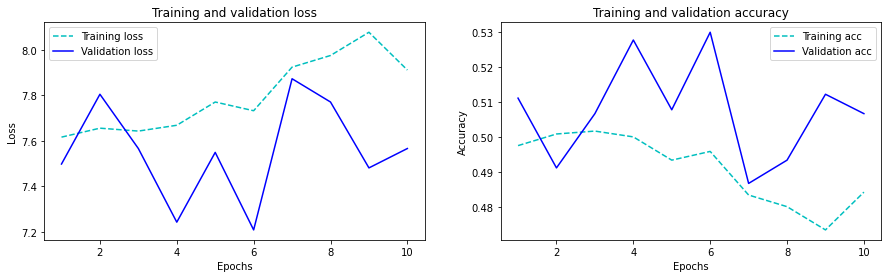

In [ ]:
# train baseline model
history = cnn.fit_generator(generator=train_gen,
                  steps_per_epoch=80,
                  validation_data=val_gen,
                  validation_steps=60,
                  epochs=10)
cnn.save('baseline_model_itr10.h5')
show_result(history)

Epoch 1/20
80/80 [==============================] - 8s 100ms/step - loss: 7.8603 - acc: 0.4875 - val_loss: 7.4811 - val_acc: 0.5122
Epoch 2/20
80/80 [==============================] - 8s 100ms/step - loss: 7.5919 - acc: 0.5050 - val_loss: 7.1914 - val_acc: 0.5311
Epoch 3/20
80/80 [==============================] - 8s 101ms/step - loss: 7.5280 - acc: 0.5092 - val_loss: 7.6004 - val_acc: 0.5044
Epoch 4/20
80/80 [==============================] - 8s 100ms/step - loss: 7.8730 - acc: 0.4867 - val_loss: 7.7367 - val_acc: 0.4956
Epoch 5/20
80/80 [==============================] - 8s 100ms/step - loss: 7.4869 - acc: 0.5117 - val_loss: 7.2936 - val_acc: 0.5244
Epoch 6/20
80/80 [==============================] - 8s 99ms/step - loss: 7.8475 - acc: 0.4883 - val_loss: 7.5493 - val_acc: 0.5078
Epoch 7/20
80/80 [==============================] - 8s 100ms/step - loss: 7.6302 - acc: 0.5025 - val_loss: 7.5152 - val_acc: 0.5100
Epoch 8/20
80/80 [==============================] - 8s 101ms/step - loss: 7.6

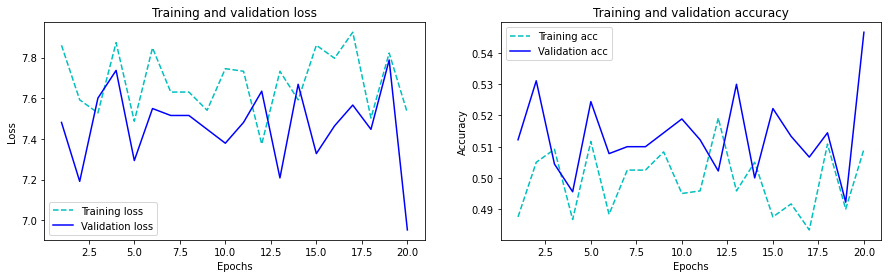

In [ ]:
cnn = models.load_model('baseline_model_itr10.h5')
history = cnn.fit_generator(generator=train_gen,
                  steps_per_epoch=80,
                  validation_data=val_gen,
                  validation_steps=60,
                  epochs=20)
cnn.save('baseline_model_itr30.h5')
show_result(history)

### 3.2 CNN with Early Stopping

Epoch 1/10
80/80 [==============================] - 8s 102ms/step - loss: 7.4001 - acc: 0.5175 - val_loss: 7.5493 - val_acc: 0.5078
Epoch 2/10
80/80 [==============================] - 8s 98ms/step - loss: 7.8730 - acc: 0.4867 - val_loss: 7.5493 - val_acc: 0.5078
Epoch 3/10
80/80 [==============================] - 8s 99ms/step - loss: 7.4896 - acc: 0.5117 - val_loss: 7.8730 - val_acc: 0.4867
Epoch 4/10
80/80 [==============================] - 8s 100ms/step - loss: 7.6430 - acc: 0.5017 - val_loss: 7.4470 - val_acc: 0.5144
Epoch 5/10
80/80 [==============================] - 8s 98ms/step - loss: 7.7964 - acc: 0.4917 - val_loss: 7.5493 - val_acc: 0.5078
Epoch 6/10
80/80 [==============================] - 8s 98ms/step - loss: 7.8730 - acc: 0.4867 - val_loss: 7.6004 - val_acc: 0.5044
Epoch 7/10
80/80 [==============================] - 8s 98ms/step - loss: 7.7580 - acc: 0.4942 - val_loss: 7.3618 - val_acc: 0.5200
Epoch 8/10
80/80 [==============================] - 8s 99ms/step - loss: 7.3618 -

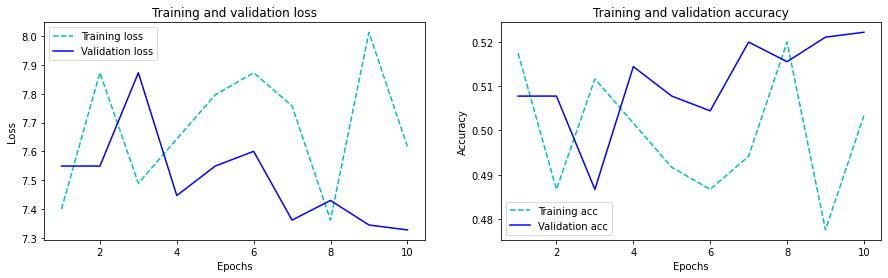

In [ ]:
# With early stop
cnn = models.load_model('baseline_model_itr30.h5')

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = cnn.fit_generator(generator=train_gen,
                  steps_per_epoch=80,
                  validation_data=val_gen,
                  validation_steps=60,
                  callbacks=[early_stop],
                  epochs=10)

cnn.save('baseline_model_itr40_earlystop.h5')
show_result(history)

## **4. Evaluate model**


#### 4.1 Show the confusion matrix and classification report
Using function ```evaluation_report(model,feature,label)``` defined above to print the classification report

In [171]:
# Calculate result
result = cnn.evaluate(test_gen, verbose=False)

# Convert the format of test labels into array 
tmp = []
for i in range(len(test_gen)):
  for j in range(len(test_gen[i][1])):
    tmp.append(test_gen[i][1][j])
labels = np.array(tmp)

# Predict and convert into a class
pred_class = np.argmax(cnn.predict(test_gen, batch_size=BATCH_SIZE), axis=1)

# Convert the test labels into a class
labels = np.argmax(labels, axis=-1)

# # Show report
print(confusion_matrix(labels,pred_class))
print(classification_report(labels,pred_class))
print("Loss: %s Accuracy: %s" %(result[0],result[1]))

[[1250    0]
 [1250    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1250
           1       0.00      0.00      0.00      1250

    accuracy                           0.50      2500
   macro avg       0.25      0.50      0.33      2500
weighted avg       0.25      0.50      0.33      2500

Loss: 7.668546199798584 Accuracy: 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **5. Data Augmentation** 

Using the ```ImageDataGenerator``` module to generate more data. This technique is called data augmentation. It help generate more variation of the data which help prevent overfit and generalize better.

Lookup in the Keras document to see what method does it provide. https://keras.io/preprocessing/image

Becasue we want to build a data generator object, we have to re-load the data and specify rescale argument in ImageDataGenerator module.

In [ ]:
# Define a generator for train set and test set

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# load images with image data generator
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                         directory=train_dir,
                                         target_size=(224,224), 
                                          batch_size=BATCH_SIZE)

validate_generator = test_datagen.flow_from_dataframe(dataframe=val_df,
                                         directory=train_dir, 
                                         target_size=(224,224),
                                           batch_size=BATCH_SIZE)

Found 20250 validated image filenames belonging to 2 classes.
Found 2250 validated image filenames belonging to 2 classes.


Epoch 1/20
80/80 [==============================] - 20s 249ms/step - loss: 7.7836 - acc: 0.4925 - val_loss: 7.2255 - val_acc: 0.5289
Epoch 2/20
80/80 [==============================] - 19s 242ms/step - loss: 7.7325 - acc: 0.4958 - val_loss: 7.3277 - val_acc: 0.5222
Epoch 3/20
80/80 [==============================] - 19s 243ms/step - loss: 8.0392 - acc: 0.4758 - val_loss: 7.0891 - val_acc: 0.5378
Epoch 4/20
80/80 [==============================] - 20s 250ms/step - loss: 7.9497 - acc: 0.4817 - val_loss: 7.2425 - val_acc: 0.5278
Epoch 5/20
80/80 [==============================] - 20s 245ms/step - loss: 7.6941 - acc: 0.4983 - val_loss: 7.3277 - val_acc: 0.5222
Epoch 6/20
80/80 [==============================] - 20s 252ms/step - loss: 7.7069 - acc: 0.4975 - val_loss: 7.5833 - val_acc: 0.5056
Epoch 7/20
80/80 [==============================] - 19s 241ms/step - loss: 7.7836 - acc: 0.4925 - val_loss: 7.6685 - val_acc: 0.5000
Epoch 8/20
80/80 [==============================] - 19s 240ms/step - 

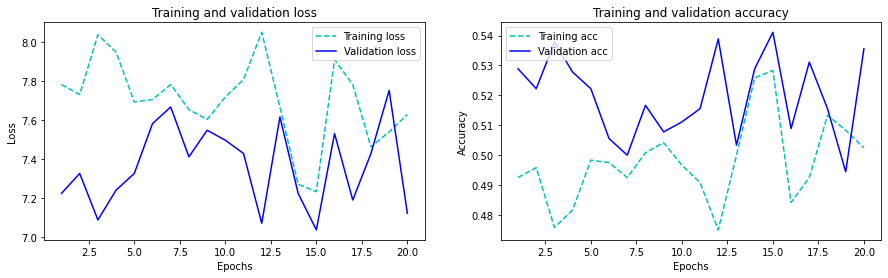

In [ ]:
# Using fit_generator to train your model. We don't need to specify the batch size since we already done that when we create Iterator
history = cnn.fit_generator(train_generator, 
                              epochs=20, 
                              verbose=1,
                              steps_per_epoch=80,
                              validation_steps=60,
                              validation_data=validate_generator)
cnn.save('baseline_model_itr60_data_aug.h5')
show_result(history)

Epoch 1/20
80/80 [==============================] - 23s 292ms/step - loss: 7.8347 - acc: 0.4892 - val_loss: 7.4845 - val_acc: 0.5120
Epoch 2/20
80/80 [==============================] - 24s 299ms/step - loss: 7.8219 - acc: 0.4900 - val_loss: 7.4845 - val_acc: 0.5120
Epoch 3/20
80/80 [==============================] - 24s 302ms/step - loss: 7.9753 - acc: 0.4800 - val_loss: 7.4845 - val_acc: 0.5120
Epoch 4/20
80/80 [==============================] - 23s 293ms/step - loss: 8.1926 - acc: 0.4658 - val_loss: 7.4845 - val_acc: 0.5120
Epoch 5/20
80/80 [==============================] - 24s 295ms/step - loss: 7.6813 - acc: 0.4992 - val_loss: 7.4845 - val_acc: 0.5120
Epoch 6/20
80/80 [==============================] - 23s 292ms/step - loss: 7.8091 - acc: 0.4908 - val_loss: 7.4845 - val_acc: 0.5120
Last train accuracy: 0.4908333420753479
Last validation accuracy: 0.5120000243186951


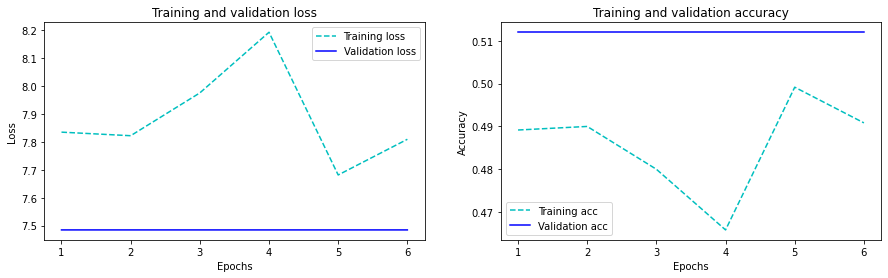

In [146]:
# Add early stop
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Load previos model
cnn = models.load_model('baseline_model_itr60_data_aug.h5')


history = cnn.fit_generator(train_generator, 
                              epochs=20, 
                              verbose=1, 
                              steps_per_epoch=80,
                              callbacks=[early_stop], 
                              validation_data=validate_generator)

cnn.save('baseline_model_itr80_data_aug_earlystop.h5')
show_result(history)

In [175]:
# # Let it run
# history = cnn.fit_generator(train_generator, 
#                               epochs=100, 
#                               verbose=0, 
#                               validation_data=validate_generator)

# cnn.save('baseline_model_itr180_data_aug.h5')
# show_result(history)

In [173]:
# Calculate result
result = cnn.evaluate(test_gen, verbose=False)

# Convert the format of test labels into array 
tmp = []
for i in range(len(test_gen)):
  for j in range(len(test_gen[i][1])):
    tmp.append(test_gen[i][1][j])
labels = np.array(tmp)

# Predict and convert into a class
pred_class = np.argmax(cnn.predict(test_gen, batch_size=BATCH_SIZE), axis=1)

# Convert the test labels into a class
labels = np.argmax(labels, axis=-1)

# # Show report
print(confusion_matrix(labels,pred_class))
print(classification_report(labels,pred_class))
print("Loss: %s Accuracy: %s" %(result[0],result[1]))

[[1250    0]
 [1250    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1250
           1       0.00      0.00      0.00      1250

    accuracy                           0.50      2500
   macro avg       0.25      0.50      0.33      2500
weighted avg       0.25      0.50      0.33      2500

Loss: 7.668544769287109 Accuracy: 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **6. Transfer learning**
- What is transfer learning https://towardsdatascience.com/transfer-learning-946518f95666
- which transfer learning method to use https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8

The following is a tutorial code to load and freeze some layer. Keras also come with a build-in pre-train network on imageNet dataset (See www.image-net.org)

Keras Pre-train Network https://keras.io/applications

#### 6.1.1 Use Build-in Pre-train Network
Keras come with a build-in pre-train network that let you download and use it in your problem. You can import only model structure or import neuron weight that had been train on imageNet.

In [ ]:
# load and modify VGG16
from keras.applications import vgg16
from keras import Model
from keras.layers import Dense, Flatten, Dropout

base_model = vgg16.VGG16(include_top=False, 
                  weights='imagenet',
                  input_shape=(224,224,3))
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu', kernel_initializer='VarianceScaling')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(2,activation='softmax',
                    kernel_initializer='VarianceScaling',
                     name='output')(x)
vgg = Model(inputs = base_model.input, outputs = predictions)
vgg.compile(optimizer=keras.optimizers.RMSprop(learning_rate= 1.0e-6),
           loss = 'categorical_crossentropy',
           metrics=['acc'])

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# exclude training the pre-trained layers
for layer in vgg.layers[0:-5]:
    layer.trainable = False

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
80/80 [==============================] - 29s 368ms/step - loss: 0.7027 - acc: 0.5225 - val_loss: 0.6384 - val_acc: 0.7100
Epoch 2/30
80/80 [==============================] - 29s 367ms/step - loss: 0.6426 - acc: 0.6342 - val_loss: 0.5686 - val_acc: 0.8283
Epoch 3/30
80/80 [==============================] - 30s 373ms/step - loss: 0.5963 - acc: 0.7017 - val_loss: 0.4903 - val_acc: 0.8550
Epoch 4/30
80/80 [==============================] - 30s 374ms/step - loss: 0.5235 - acc: 0.7567 - val_loss: 0.3992 - val_acc: 0.8650
Epoch 5/30
80/80 [==============================] - 30s 376ms/step - loss: 0.4679 - acc: 0.7950 - val_loss: 0.3490 - val_acc: 0.8567
Epoch 6/30
80/80 [==============================] - 30s 376ms/step - loss: 0.4066 - acc: 0.8308 - val_loss: 0.2843 - val_acc: 0.8817
Epoch 7/30
80/80 [==============================] - 31s 382ms/step - loss: 0.3309 - acc: 0.8608 - val_loss: 0.2265 - val_acc: 

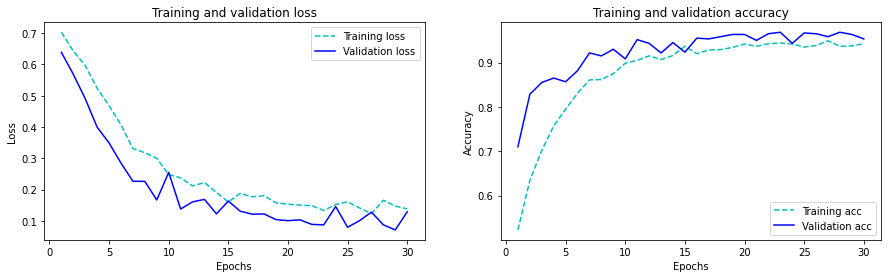

In [ ]:
history = vgg.fit_generator(generator=train_generator,
                  steps_per_epoch= 80,
                  epochs=30,
                  validation_data=val_gen,
                  validation_steps= 40)
show_result(history)

In [170]:
# Calculate result
result = vgg.evaluate(test_gen, verbose=False)

# Convert the format of test labels into array 
tmp = []
for i in range(len(test_gen)):
  for j in range(len(test_gen[i][1])):
    tmp.append(test_gen[i][1][j])
labels = np.array(tmp)

# Predict and convert into a class
pred_class = np.argmax(vgg.predict(test_gen, batch_size=BATCH_SIZE), axis=1)

# Convert the test labels into a class
labels = np.argmax(labels, axis=-1)

# # Show report
print(confusion_matrix(labels,pred_class))
print(classification_report(labels,pred_class))
print("Loss: %s Accuracy: %s" %(result[0],result[1]))

[[1200   50]
 [  25 1225]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1250
           1       0.96      0.98      0.97      1250

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500

Loss: 0.07792846858501434 Accuracy: 0.9700000286102295


## **7. Your Turn! Dog or Cat Application** 

Now, it time to put everything together and develop and Cat vs Dog classifier model. Assume that you and your company want to get more attraction on your product by launching a new product that can classify whether it is a dog or a cat. You have decide that you want a precision more than 90 - 95% in order to launch to product.

You have a cat and dog dataset contain total of 25000 images, 12500 for cat and other half for a dog.

After successfully develop this model, you can try to play with it to see how it perform. (You can upload your selfies image to see you are a dog or a cat)

Some note before start a project:
1. You have to load a data into a project using any method (we are not using build-in data anymore!)
2. You have to plan on how you will split a data.
3. You have to preprocess your data before feed into a network. For example, cropping, padding, etc.
4. You can come up with any model or use pre-train model. It depend on you!

You have two week for this project so that you can compete with your competitor app! Now, create a new Jupyter notebook and start building a model!

In [ ]:
def catOrDog(pred):
  if np.argmax(pred, axis=1) == 0:
    print("This is a cat")
  else:
    print("This is a dog")

#### **7.1 Selfie image**

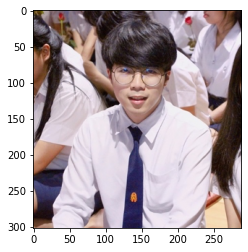

In [ ]:
import cv2
selfie_img = cv2.imread('Picture1.png')
selfie_img = cv2.cvtColor(selfie_img, cv2.COLOR_BGR2RGB)
selfie_img = selfie_img/255
plt.imshow(selfie_img)
selfie_img.resize((1,224,224,3))

In [ ]:
pred = vgg.predict(selfie_img)
catOrDog(pred)

This is a cat


#### **7.2 Dog image**

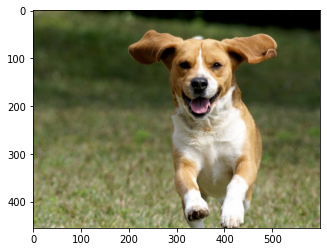

In [ ]:
selfie_img = cv2.imread('dog.jpg')
selfie_img = cv2.cvtColor(selfie_img, cv2.COLOR_BGR2RGB)
selfie_img = selfie_img/255
plt.imshow(selfie_img)
selfie_img.resize((1,224,224,3))

In [ ]:
pred = vgg.predict(selfie_img)
catOrDog(pred)

This is a cat


#### **7.3 Cat image**

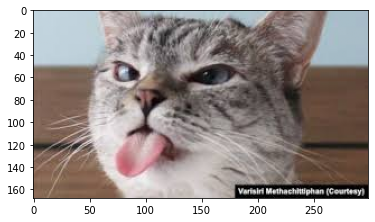

In [ ]:
selfie_img = cv2.imread('cat.jpg')
selfie_img = cv2.cvtColor(selfie_img, cv2.COLOR_BGR2RGB)
selfie_img = selfie_img/255
plt.imshow(selfie_img)
selfie_img.resize((1,224,224,3))

In [ ]:
pred = vgg.predict(selfie_img)
catOrDog(pred)

This is a cat


## **8. Lab conclusion**

Conclusion<br>
1. How the image data are loaded?<br>
  The image data are loaded by using wget command (command for downloading files from Internet) as zip file and then use unzip command to extract it to Colab cloud drives. The images are imported via ImageDataGenerator by setting directory parameter point to entire images path.

2. How the preprocessing does?<br>
  While they’re importing, the generator rescales the images as well. Then, flow_from_dataframe function is used to resize the image into 224*224 dimension and define batch size to be 15 images per batch.
  
3. How tuner work and model is built?<br>
  Unfortunately, we can’t have more time to create tuner and find the best parameters for the model. Thus, we try to use the CNN model from lab5 as experiment.
  
4. Training the model and its result? <br>
  We have trained the model in 2 ways 1) Training the traditional CNN model with 30 epochs and 2) Training with early stopping. The first one, the accuracy score is 0.509 and the second one, the accuracy score is 0.503
  
5. Evaluation the model from 4)<br>
  The accuracy score is 0.5 when test with the test dataset.
  
6. Data Augmentation<br>
  After using other view generator, the accuracy score is 0.502
  
7. Transfer Learning <br>
  Appling VVG-16 as pretrained model, then add more 3 fully-connected layers on top of it. We train only new added layers. The accuracy score is 0.942 and precision score is 0.98 for cat and 0.96 for dog prediction.

8. Trying application<br>
  From trying to apply selfie image, the model predicts it is a cat. Before applying, it is preprocessed like the train dataset. We have tried with real cat and dog image as well. The result is that the dog image is predicted as a cat and the cat image is predicted as a cat.
